In [2]:
import porespy as ps
import numpy as np 
import matplotlib.pyplot as plt
import scipy.ndimage as spim
import scipy.io as sio
import openpnm as op
import imageio
import numpy as np
from porespy.filters import find_peaks, trim_saddle_points, trim_nearby_peaks
from porespy.tools import randomize_colors
from skimage.morphology import watershed
from matplotlib import cm

ps.visualization.set_mpl_style()

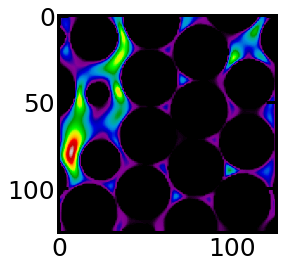

In [3]:

velocityData = np.loadtxt('velocity.dat')
velocityData = np.reshape(velocityData,(126,126,126,3))

velocityNormData = np.loadtxt('velocityNorm.dat')
np.shape(velocityNormData)

velocityNormData = np.reshape(velocityNormData,(126,126,126))

data = np.loadtxt("beadPack_flipped_126.dat",delimiter=',')
beadPack = np.reshape(data,(126,126,126)) 

plt.figure(2)
plt.imshow(velocityNormData[:,:,80], cmap=plt.cm.nipy_spectral)

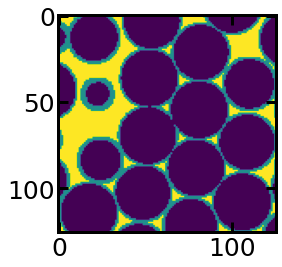

In [5]:
plt.imshow(beadPack[:,:,80])


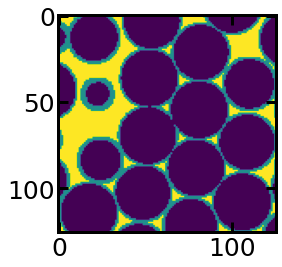

In [8]:
test = beadPack[:,:,80]

#origtest = test
#test[np.where(origtest >= 1)] = 0
#test[np.where(origtest < 1)] = 1
plt.imshow(test)

100%|██████████| 25/25 [00:00<00:00, 387.00it/s]


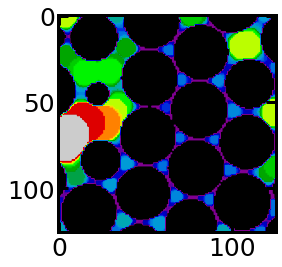

In [9]:
lt = ps.filters.local_thickness(test)
plt.imshow(lt,cmap=plt.cm.nipy_spectral)



In [10]:
snow_output = ps.networks.snow(beadPack,
                               voxel_size=1,
                               boundary_faces=['left','right','front','back','top','bottom'],
                               marching_cubes_area=False)

____________________________________________________________
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  347
Peaks after trimming saddle points:  194
Peaks after trimming nearby peaks:  194


  5%|▍         | 17/372 [00:00<00:02, 166.43it/s]

____________________________________________________________
Extracting pore and throat information from image


100%|██████████| 372/372 [00:01<00:00, 324.24it/s]


In [12]:
pn = op.network.GenericNetwork()
pn.update(snow_output)
prj = pn.project

In [13]:
prj.export_data(filename='extraction', filetype='vtk')

In [14]:
ps.io.to_vtk(beadPack,path='test',divide=False, downsample=False, voxel_size=1, vox=False)